In [ ]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install copernicusmarine

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 6.9 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=a00a4050d4d748a103eb028aeff45dc299395985e6975a3281e2dc2909a46bc4
  Stored in directory: /root/.cache/pip/wheels/71/c1/da/23077eb3b87d24d6f3852ed1ed1a1ac2d3c885ad6ebd2b4a07
Successfully built asciitree


In [ ]:
import copernicusmarine as cm

# 1.Transparency

In [ ]:
# Transparency L4
cm.subset(
  dataset_id="cmems_obs-oc_glo_bgc-transp_my_l4-gapfree-multi-4km_P1D",
  minimum_longitude=-10.7636430359399,
  maximum_longitude=-2.148977569252043,
  minimum_latitude=49.131743778296155,
  maximum_latitude=52.238672307265546,
  start_datetime="2023-02-01T00:00:00",
  end_datetime="2025-02-01T23:59:59",
  output_filename="Transparency_L4_P1D_Feb23-25.nc",
  output_directory="copernicus-data"
)

INFO - 2025-02-16T12:45:18Z - Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register
INFO:copernicusmarine:Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register


Copernicus Marine username:Abort


In [ ]:
DS = xr.open_dataset("copernicus-data/Transparency_L4_P1D_Feb23-25.nc")

# Convert the xarray dataset to a DataFrame
Feb23_25 = DS.to_dataframe().reset_index()

# Save the DataFrame as a CSV file
csv_file_path = "Feb23_25.csv"
Feb23_25.to_csv(csv_file_path, index=False)

print(f"CSV file saved as: {csv_file_path}")

CSV file saved as: Feb23_25.csv


In [ ]:
Feb23_25.head()

,time,latitude,longitude,KD490,KD490_uncertainty,ZSD,ZSD_uncertainty,flags
0,2023-02-01,49.145832,-10.729161,0.040630,34.839999,22.839306,18.41,2
1,2023-02-01,49.145832,-10.687495,0.040552,29.859999,22.893938,13.39,2
2,2023-02-01,49.145832,-10.645828,0.040584,29.849999,22.871334,13.40,2
3,2023-02-01,49.145832,-10.604161,0.040506,29.879999,22.927034,13.39,2
4,2023-02-01,49.145832,-10.562495,0.040459,29.899999,22.960041,13.38,2


In [ ]:
Feb23_25.tail()

,time,latitude,longitude,KD490,KD490_uncertainty,ZSD,ZSD_uncertainty,flags
11309395,2025-02-01,52.229164,-2.354161,NaN,NaN,NaN,NaN,1
11309396,2025-02-01,52.229164,-2.312495,NaN,NaN,NaN,NaN,1
11309397,2025-02-01,52.229164,-2.270828,NaN,NaN,NaN,NaN,1
11309398,2025-02-01,52.229164,-2.229161,NaN,NaN,NaN,NaN,1
11309399,2025-02-01,52.229164,-2.187495,NaN,NaN,NaN,NaN,1


Number of NaN values in each column:
time                       0
latitude                   0
longitude                  0
KD490                2407763
KD490_uncertainty    2407763
ZSD                  2408019
ZSD_uncertainty      2407763
flags                      0
dtype: int64
NaN report saved as: nan_report.csv
Number of NaN values in filtered_df:
time                 0
latitude             0
longitude            0
KD490                0
KD490_uncertainty    0
ZSD                  0
ZSD_uncertainty      0
flags                0
dtype: int64
Filtered DataFrame saved as: filtered_df_feb.csv
Unique values in 'flags' column:
[2 0 1]
Counts of each unique flag:
flags
2    4891965
0    4021599
1    2395836
Name: count, dtype: int64
Rows with 'flags' not equal to 0:
        time   latitude  longitude     KD490  KD490_uncertainty        ZSD  \
0 2023-02-01  49.145832 -10.729161  0.040630          34.839999  22.839306   
1 2023-02-01  49.145832 -10.687495  0.040552          29.859999  22.8

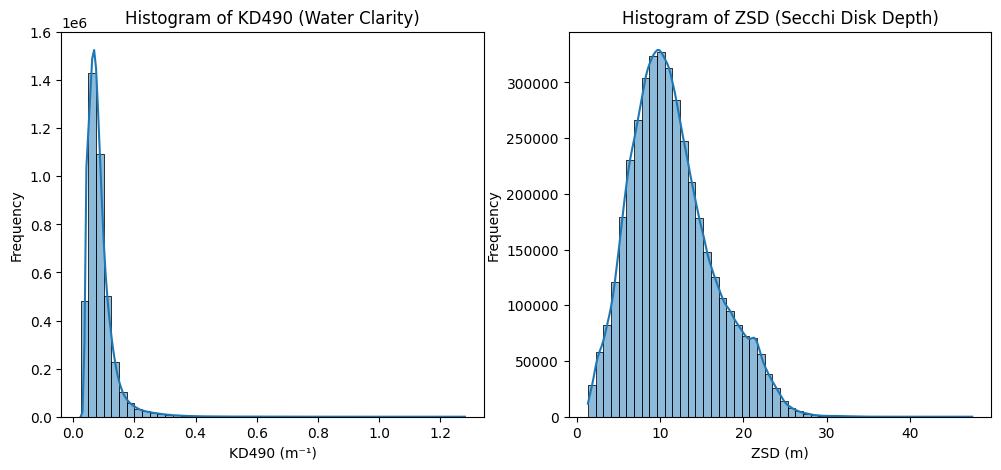

<Figure size 1000x600 with 0 Axes>

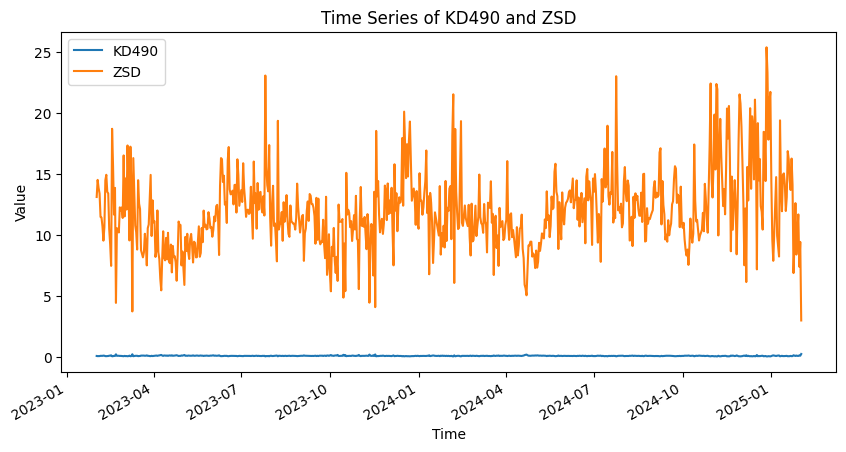

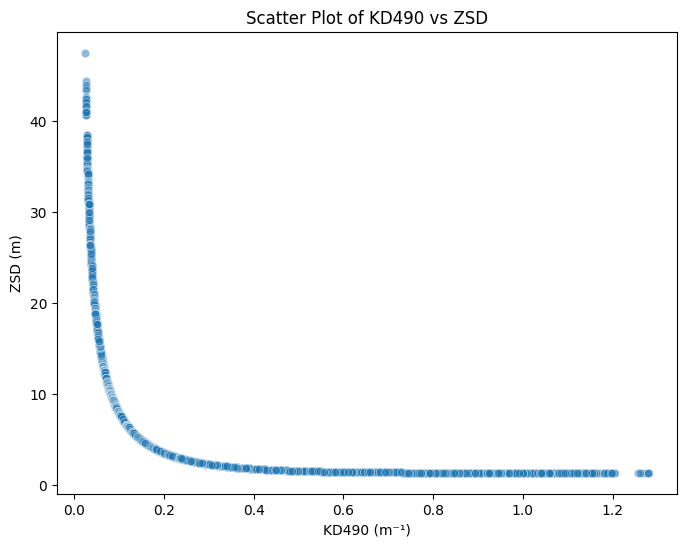

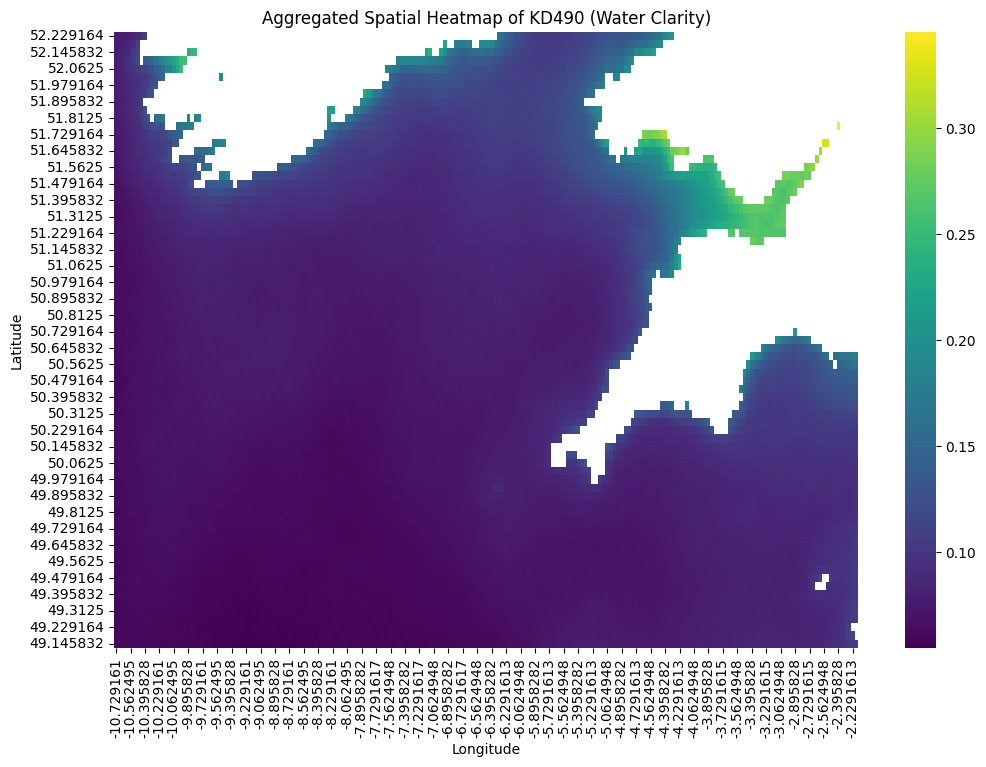

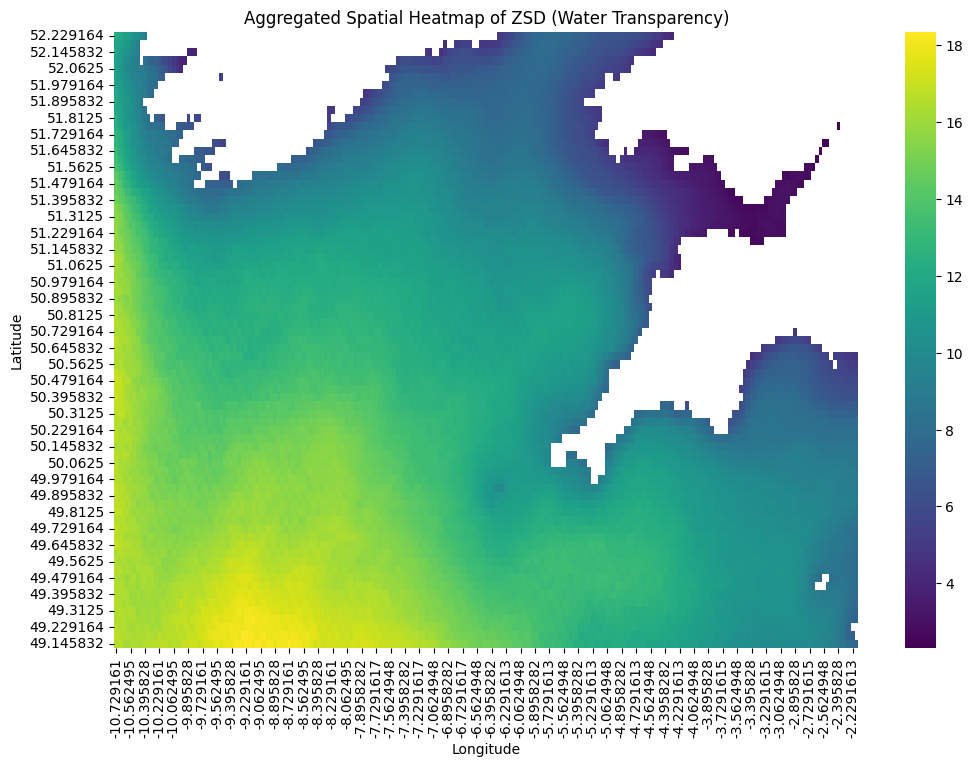

In [ ]:
### ---- STEP 1: CHECK NaN VALUES ---- ###
nan_counts = Feb23_25.isnull().sum()
print("Number of NaN values in each column:")
print(nan_counts)

# Save NaN report
nan_report_path = "nan_report.csv"
nan_counts.to_csv(nan_report_path, header=["NaN Count"])
print(f"NaN report saved as: {nan_report_path}")

### ---- STEP 2: FILTERING OUT NaN VALUES ---- ###
# Removing rows where KD490, KD490_uncertainty, ZSD, and ZSD_uncertainty are NaN
filtered_df = Feb23_25.dropna(subset=["KD490", "KD490_uncertainty", "ZSD", "ZSD_uncertainty"])

# Checking for NaN values after filtering
nan_counts_filtered = filtered_df.isnull().sum()
print("Number of NaN values in filtered_df:")
print(nan_counts_filtered)

# Save filtered dataset
filtered_csv_path = "filtered_df_feb.csv"
filtered_df.to_csv(filtered_csv_path, index=False)
print(f"Filtered DataFrame saved as: {filtered_csv_path}")

### ---- STEP 3: ANALYZING FLAGS ---- ###
print("Unique values in 'flags' column:")
print(Feb23_25['flags'].unique())

# Count occurrences of each flag value
print("Counts of each unique flag:")
print(Feb23_25['flags'].value_counts())

# Checking non-zero flag values
non_zero_flags = Feb23_25[Feb23_25['flags'] != 0]
if not non_zero_flags.empty:
    print("Rows with 'flags' not equal to 0:")
    print(non_zero_flags.head())

# If needed, remove flagged data
filtered_df = filtered_df[filtered_df['flags'] == 0]
print(f"Filtered dataset now contains {filtered_df.shape[0]} rows.")

### ---- STEP 4: DATA VISUALIZATION ---- ###

# Histogram for KD490 and ZSD
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(filtered_df["KD490"], bins=50, kde=True)
plt.title("Histogram of KD490 (Water Clarity)")
plt.xlabel("KD490 (m⁻¹)")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(filtered_df["ZSD"], bins=50, kde=True)
plt.title("Histogram of ZSD (Secchi Disk Depth)")
plt.xlabel("ZSD (m)")
plt.ylabel("Frequency")
plt.show()

# Time Series for KD490 and ZSD
plt.figure(figsize=(10, 6))
filtered_df.groupby("time")[["KD490", "ZSD"]].mean().plot(figsize=(10, 5))
plt.title("Time Series of KD490 and ZSD")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(["KD490", "ZSD"])
plt.show()

# Scatter plot of KD490 vs ZSD
plt.figure(figsize=(8, 6))
sns.scatterplot(x=filtered_df["KD490"], y=filtered_df["ZSD"], alpha=0.5)
plt.xlabel("KD490 (m⁻¹)")
plt.ylabel("ZSD (m)")
plt.title("Scatter Plot of KD490 vs ZSD")
plt.show()

# Spatial Heatmaps
for col, title in zip(["KD490", "ZSD"], ["KD490 (Water Clarity)", "ZSD (Water Transparency)"]):
    aggregated_df = filtered_df.groupby(["latitude", "longitude"], as_index=False)[col].mean()
    spatial_df = aggregated_df.pivot(index="latitude", columns="longitude", values=col)
    spatial_df = spatial_df[::-1]  # Reverse the order of latitude

    plt.figure(figsize=(12, 8))
    sns.heatmap(spatial_df, cmap="viridis", cbar=True)
    plt.title(f"Aggregated Spatial Heatmap of {title}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()


**1**.Histogram of KD490 and ZSD

KD490 (Water Clarity) Histogram

Description:
KD490 represents water clarity, with lower values indicating clearer water.
The distribution is highly skewed, with most values concentrated at low KD490 levels (around 0-0.2).
This suggests that most of the observed ocean regions have relatively clear water.

ZSD (Secchi Disk Depth) Histogram

Description:
ZSD measures water transparency, where higher values indicate clearer water.
The histogram is bimodal, showing two peaks, which could indicate different water types:
One peak around 10 meters (moderate clarity).
Another peak around 20-25 meters (high clarity).
This suggests the dataset captures waters of varying transparency, possibly due to different environmental factors.

2.Time Series Plot of KD490 and ZSD

KD490 Trends:
Appears relatively stable over time, with minor fluctuations.
Consistently low values, confirming that most regions in the dataset have clear water.

ZSD Trends:
More variable than KD490, with fluctuations over time.
Peaks in ZSD values might be associated with seasonal variations or specific oceanic conditions.

3.Scatter Plot of KD490 vs. ZSD

Inverse Relationship:
Higher KD490 values correspond to lower ZSD values, forming a curve.
This makes sense because higher turbidity (more suspended particles) reduces water transparency.

4.Heatmaps

KD490 Heatmap

Description:
Represents spatial variations in water clarity.
Darker areas (lower KD490) indicate clearer water.
Lighter areas (higher KD490) indicate more turbid regions.

ZSD Heatmap

Description:
Represents spatial distribution of water transparency.
Higher ZSD (yellow regions) indicate clear water.
Lower ZSD (dark blue regions) indicate more turbid water.

# 2.Plankton

In [ ]:
# Plankton L4
cm.subset(
  dataset_id="cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D",
  minimum_longitude=-10.7636430359399,
  maximum_longitude=-2.148977569252043,
  minimum_latitude=49.131743778296155,
  maximum_latitude=52.238672307265546,
  start_datetime="2023-02-01T00:00:00",
  end_datetime="2025-02-01T23:59:59",
  output_filename="Plankton_L4_P1D_Feb23-25.nc",
  output_directory="copernicus-data"
)

INFO - 2025-02-16T12:46:33Z - Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register
INFO:copernicusmarine:Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register


Copernicus Marine username: icolic
Copernicus Marine password: ··········


INFO - 2025-02-16T12:46:42Z - Selected dataset version: "202311"
INFO:copernicusmarine:Selected dataset version: "202311"
INFO - 2025-02-16T12:46:42Z - Selected dataset part: "default"
INFO:copernicusmarine:Selected dataset part: "default"
INFO - 2025-02-16T12:46:54Z - Starting download. Please wait...
INFO:copernicusmarine:Starting download. Please wait...


  0%|          | 0/522 [00:00<?, ?it/s]

INFO - 2025-02-16T12:48:46Z - Successfully downloaded to copernicus-data/Plankton_L4_P1D_Feb23-25_(1).nc
INFO:copernicusmarine:Successfully downloaded to copernicus-data/Plankton_L4_P1D_Feb23-25_(1).nc


ResponseSubset(file_path=PosixPath('copernicus-data/Plankton_L4_P1D_Feb23-25_(1).nc'), output_directory=PosixPath('copernicus-data'), filename='Plankton_L4_P1D_Feb23-25_(1).nc', file_size=75.55288549618321, data_transfer_size=943.0570992366413, variables=['CHL', 'CHL_uncertainty', 'flags'], coordinates_extent=[GeographicalExtent(minimum=-10.729161262512207, maximum=-2.1874947547912598, unit='degrees_east', coordinate_id='longitude'), GeographicalExtent(minimum=49.14583206176758, maximum=52.229164123535156, unit='degrees_north', coordinate_id='latitude'), TimeExtent(minimum='2023-02-01T00:00:00+00:00', maximum='2025-02-01T00:00:00+00:00', unit='iso8601', coordinate_id='time')], status='000', message='The request was successful.', file_status='DOWNLOADED')

In [ ]:
DS = xr.open_dataset("copernicus-data/Plankton_L4_P1D_Feb23-25.nc")

# Convert the xarray dataset to a DataFrame
PFeb23_25 = DS.to_dataframe().reset_index()

# Save the DataFrame as a CSV file
csv_file_path = "PFeb23_25.csv"
PFeb23_25.to_csv(csv_file_path, index=False)

print(f"CSV file saved as: {csv_file_path}")

CSV file saved as: PFeb23_25.csv


In [ ]:
PFeb23_25.head()

In [ ]:
PFeb23_25.tail()

,time,latitude,longitude,CHL,CHL_uncertainty,flags
11309395,2025-02-01,52.229164,-2.354161,NaN,NaN,1
11309396,2025-02-01,52.229164,-2.312495,NaN,NaN,1
11309397,2025-02-01,52.229164,-2.270828,NaN,NaN,1
11309398,2025-02-01,52.229164,-2.229161,NaN,NaN,1
11309399,2025-02-01,52.229164,-2.187495,NaN,NaN,1


In [ ]:
# Check for NaN values
nan_counts = PFeb23_25.isnull().sum()
print("\nNumber of NaN values in each column:")
print(nan_counts)

# Save NaN report to a CSV file
nan_counts.to_csv("nan_report_plankton.csv", header=["NaN Count"])
print("NaN report saved as: nan_report_plankton.csv")

# Remove NaN values
filtered_df_plankton = PFeb23_25.dropna(subset=["CHL", "CHL_uncertainty"])

# Save filtered data
filtered_df_plankton.to_csv("filtered_df_plankton.csv", index=False)
print("Filtered DataFrame saved as: filtered_df_plankton.csv")

# Display summary statistics
print("\nSummary Statistics:")
print(filtered_df_plankton.describe())

# Check unique values in the 'flags' column
unique_flags = filtered_df_plankton["flags"].unique()
print("\nUnique values in 'flags' column:", unique_flags)

# Count occurrences of each flag value
flag_counts = filtered_df_plankton["flags"].value_counts()
print("\nCounts of each unique flag:\n", flag_counts)


Number of NaN values in each column:
time                     0
latitude                 0
longitude                0
CHL                2407763
CHL_uncertainty    2407763
flags                    0
dtype: int64
NaN report saved as: nan_report_plankton.csv
Filtered DataFrame saved as: filtered_df_plankton.csv

Summary Statistics:
                                time      latitude     longitude  \
count                        8901637  8.901637e+06  8.901637e+06   
mean   2024-02-01 11:57:27.289392896  5.047041e+01 -6.838373e+00   
min              2023-02-01 00:00:00  4.914583e+01 -1.072916e+01   
25%              2023-08-02 00:00:00  4.972916e+01 -8.729161e+00   
50%              2024-02-01 00:00:00  5.039583e+01 -6.854162e+00   
75%              2024-08-02 00:00:00  5.118750e+01 -5.145828e+00   
max              2025-02-01 00:00:00  5.222916e+01 -2.187495e+00   
std                              NaN  4.134491e+00  2.297130e+00   

                CHL  CHL_uncertainty         flags  
c

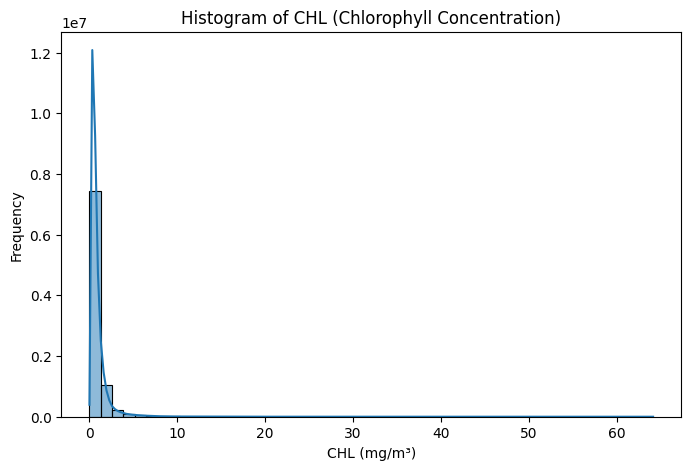

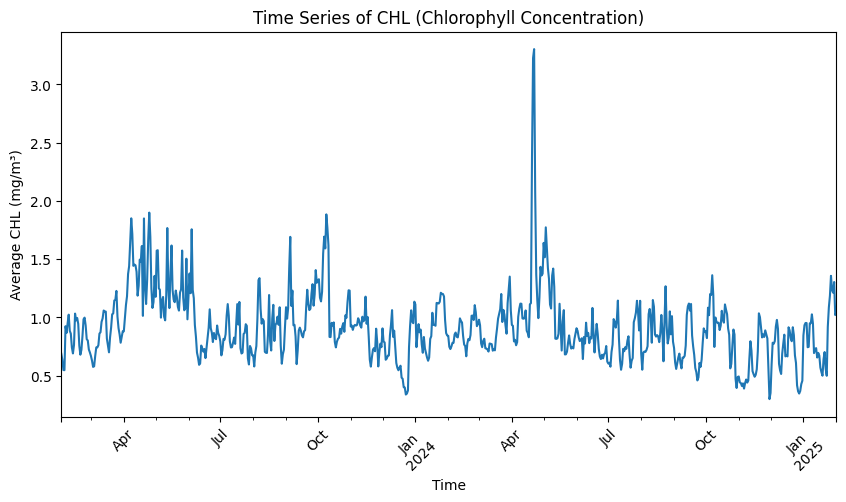

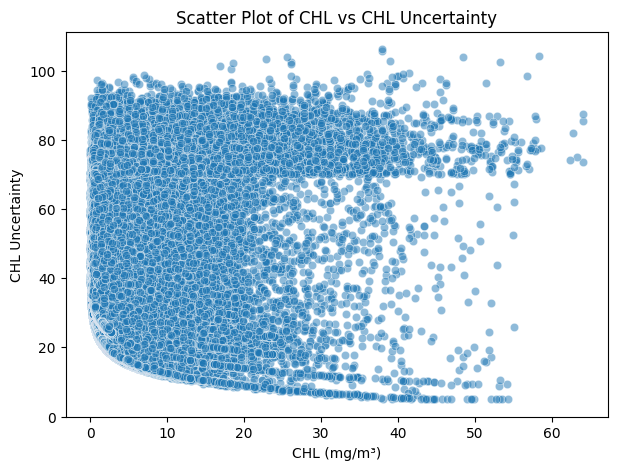

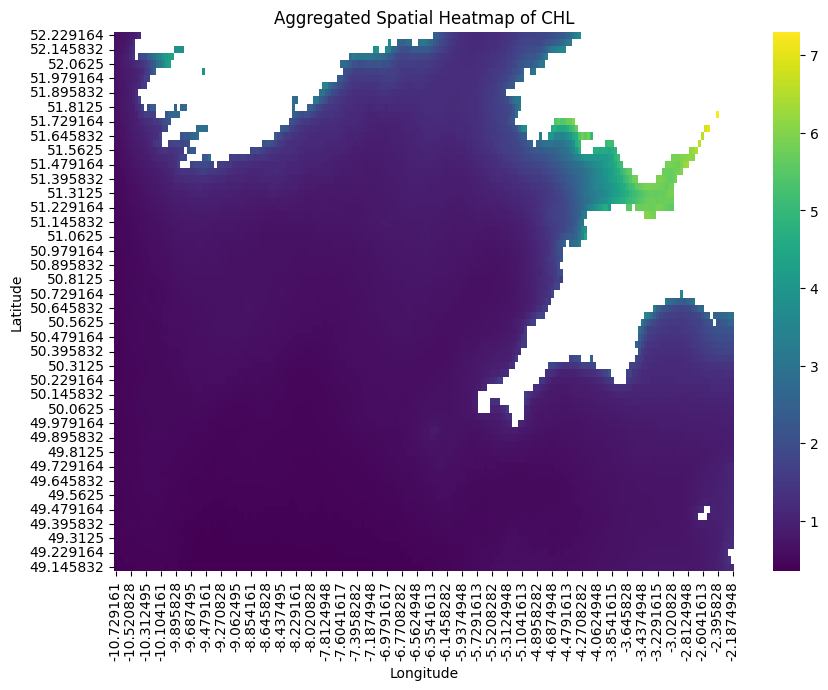

In [ ]:
# Histogram of CHL (Chlorophyll Concentration)
plt.figure(figsize=(8,5))
sns.histplot(filtered_df_plankton["CHL"], bins=50, kde=True)
plt.xlabel("CHL (mg/m³)")
plt.ylabel("Frequency")
plt.title("Histogram of CHL (Chlorophyll Concentration)")
plt.show()

# Time Series Plot for CHL
plt.figure(figsize=(10,5))
filtered_df_plankton.groupby("time")["CHL"].mean().plot()
plt.xlabel("Time")
plt.ylabel("Average CHL (mg/m³)")
plt.title("Time Series of CHL (Chlorophyll Concentration)")
plt.xticks(rotation=45)
plt.show()

# Scatter Plot of CHL vs CHL_uncertainty
plt.figure(figsize=(7,5))
sns.scatterplot(x=filtered_df_plankton["CHL"], y=filtered_df_plankton["CHL_uncertainty"], alpha=0.5)
plt.xlabel("CHL (mg/m³)")
plt.ylabel("CHL Uncertainty")
plt.title("Scatter Plot of CHL vs CHL Uncertainty")
plt.show()

# Spatial Heatmap of CHL
# Aggregate data for heatmap
spatial_df = filtered_df_plankton.groupby(["latitude", "longitude"])["CHL"].mean().reset_index()
pivot_df = spatial_df.pivot(index="latitude", columns="longitude", values="CHL")
pivot_df = pivot_df[::-1]  # Reverse the order of latitude

# Plot heatmap
plt.figure(figsize=(10,7))
sns.heatmap(pivot_df, cmap="viridis", cbar=True)
plt.title("Aggregated Spatial Heatmap of CHL")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


1.Histogram of CHL (Chlorophyll Concentration)

This plot displays the distribution of chlorophyll concentration (CHL) values across the dataset.
The x-axis represents CHL values (mg/m³), while the y-axis represents the frequency of data points.
The histogram shows that most values are concentrated near lower CHL levels, suggesting that high chlorophyll levels are relatively rare.
A density curve is also plotted, giving an estimate of the probability distribution.

2.Time Series of CHL (Chlorophyll Concentration)

This plot visualizes how CHL changes over time.
The x-axis represents time (from Feb 2023 to Feb 2025), and the y-axis represents average CHL values per day.
The time series exhibits seasonal variations, with peaks and dips, indicating fluctuations in phytoplankton biomass.
A sharp spike is visible around April 2024, which might indicate an event such as a phytoplankton bloom.

3.Scatter Plot of CHL vs CHL Uncertainty

This plot examines the relationship between CHL values and uncertainty in CHL measurements.
The x-axis represents CHL concentration (mg/m³), and the y-axis represents CHL uncertainty.
The plot shows a high uncertainty for lower CHL values and some dispersion for higher CHL values.
This pattern suggests that as CHL increases, uncertainty remains somewhat high but becomes more spread out.

4.Aggregated Spatial Heatmap of CHL

This geospatial heatmap visualizes CHL concentration across different locations.
The x-axis represents longitude, and the y-axis represents latitude.
The color gradient represents CHL values, with darker areas showing low CHL levels and brighter areas indicating higher CHL concentrations.
The heatmap shows higher chlorophyll levels near coastal regions, which is expected due to nutrient-rich waters supporting phytoplankton growth.

# 3.Transparency (Version 2?)

<ipython-input-20-25f82399c3e9>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="month", y="ZSD", data=transparency_df, palette="coolwarm")


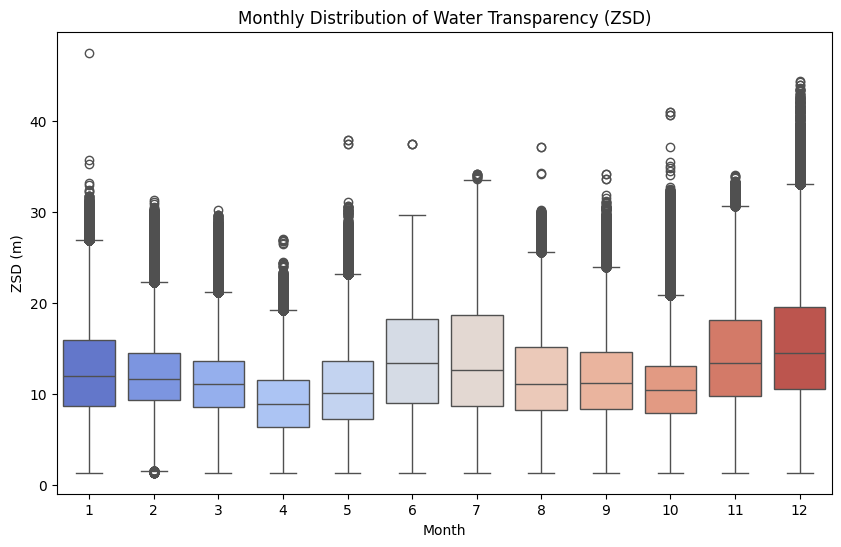

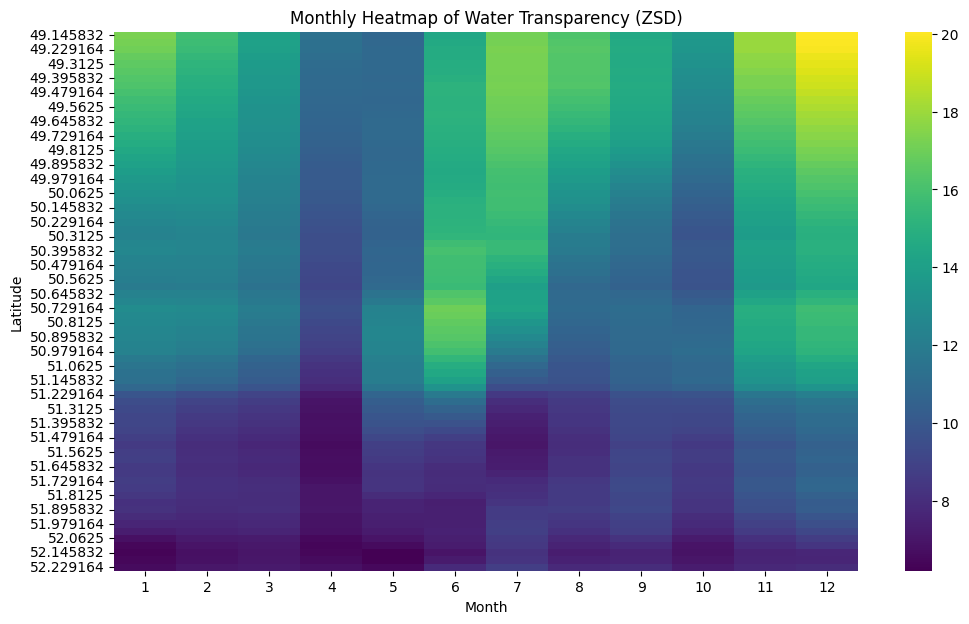

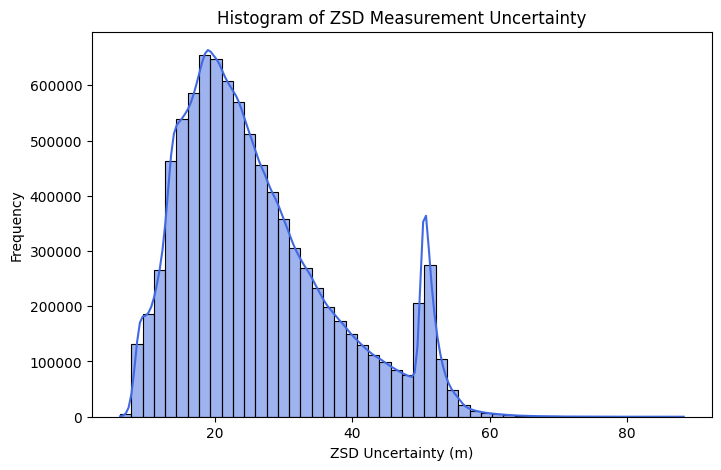

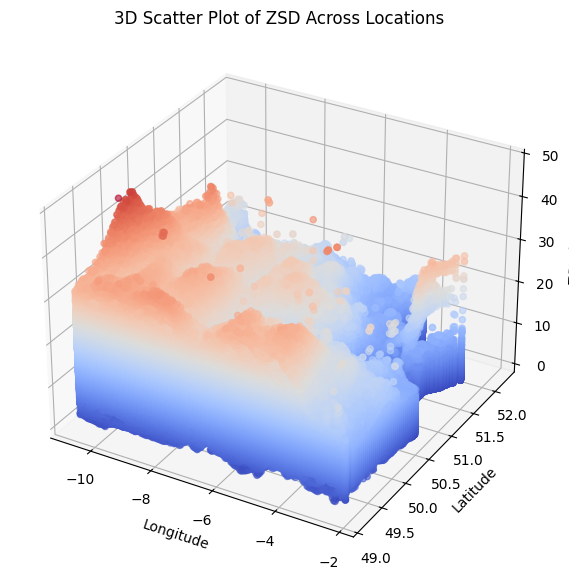

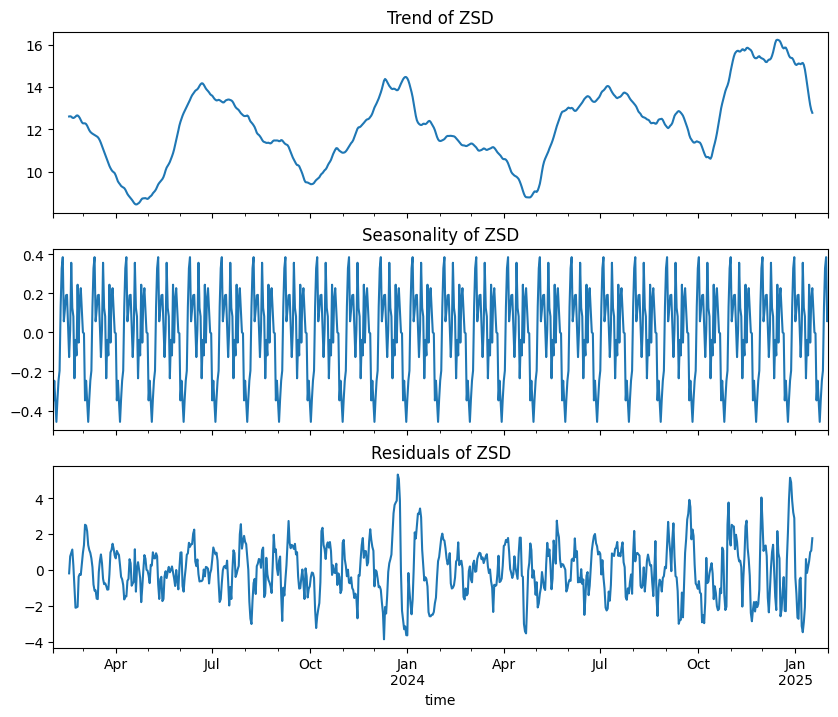

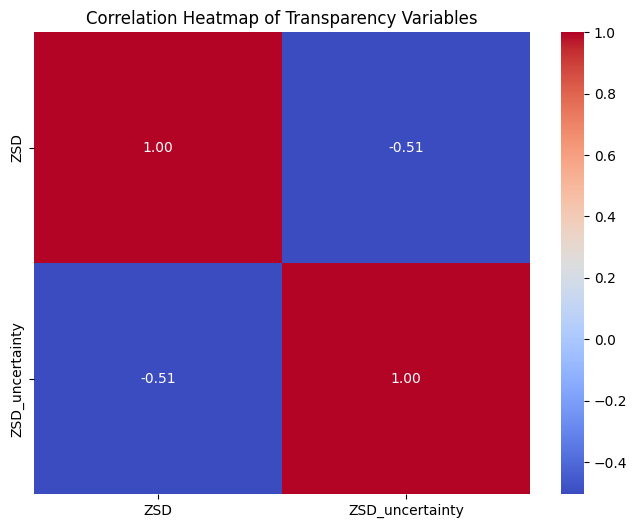

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm

# Load the Transparency dataset
transparency_df = pd.read_csv("Feb23_25.csv", parse_dates=["time"])

# Handle missing values by dropping rows where ZSD or ZSD_uncertainty is NaN
transparency_df = transparency_df.dropna(subset=["ZSD", "ZSD_uncertainty"])

# Extract Month for Monthly Analysis
transparency_df["month"] = transparency_df["time"].dt.month

# Boxplot of ZSD by Month
plt.figure(figsize=(10, 6))
sns.boxplot(x="month", y="ZSD", data=transparency_df, palette="coolwarm")
plt.title("Monthly Distribution of Water Transparency (ZSD)")
plt.xlabel("Month")
plt.ylabel("ZSD (m)")
plt.show()

# Monthly Heatmap of Water Transparency
pivot_table = transparency_df.pivot_table(values="ZSD", index="latitude", columns="month", aggfunc="mean")
plt.figure(figsize=(12, 7))
sns.heatmap(pivot_table, cmap="viridis", cbar=True)
plt.title("Monthly Heatmap of Water Transparency (ZSD)")
plt.xlabel("Month")
plt.ylabel("Latitude")
plt.show()

# Histogram of ZSD Uncertainty
plt.figure(figsize=(8, 5))
sns.histplot(transparency_df["ZSD_uncertainty"], bins=50, kde=True, color="royalblue")
plt.title("Histogram of ZSD Measurement Uncertainty")
plt.xlabel("ZSD Uncertainty (m)")
plt.ylabel("Frequency")
plt.show()

# 3D Scatter Plot of ZSD vs Latitude vs Longitude
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(transparency_df["longitude"], transparency_df["latitude"], transparency_df["ZSD"], c=transparency_df["ZSD"], cmap="coolwarm", alpha=0.6)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("ZSD (m)")
ax.set_title("3D Scatter Plot of ZSD Across Locations")
plt.show()

# Seasonal Decomposition of ZSD
transparency_df_daily = transparency_df.groupby("time")["ZSD"].mean().reset_index()
transparency_df_daily = transparency_df_daily.set_index("time")
decomposition = sm.tsa.seasonal_decompose(transparency_df_daily, model="additive", period=30)

fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
decomposition.trend.plot(ax=axes[0], title="Trend of ZSD")
decomposition.seasonal.plot(ax=axes[1], title="Seasonality of ZSD")
decomposition.resid.plot(ax=axes[2], title="Residuals of ZSD")
plt.show()

# Correlation Heatmap (ZSD, KD490, CHL, Uncertainty)
corr_columns = ["ZSD", "ZSD_uncertainty"]
corr_matrix = transparency_df[corr_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Transparency Variables")
plt.show()


1.Monthly Distribution of Water Transparency (ZSD) (Box Plot)

This box plot shows the monthly distribution of ZSD (Secchi Disk Depth), which represents water transparency.
Each box shows the spread of data for a month, with the median as the middle line. The upper and lower edges show the interquartile range (IQR), and dots represent outliers.
Higher ZSD values indicate clearer water, while lower values indicate murkier water.
The distribution fluctuates across months, with some months having wider variations and more extreme values.

2.Monthly Heatmap of Water Transparency (ZSD)

This heatmap visualizes how water transparency varies across latitudes and months.
The x-axis represents months (1-12), and the y-axis represents different latitude locations.
Brighter colors indicate higher transparency, while darker colors indicate lower transparency.
The pattern suggests that certain latitudes experience more transparent waters during specific months.

3.Histogram of ZSD Measurement Uncertainty

This histogram displays the frequency of different levels of uncertainty in ZSD measurements.
The peak around 20m suggests that most measurements have this level of uncertainty.
A second peak around 50-60m could indicate certain conditions leading to higher measurement errors.

4.3D Scatter Plot of ZSD Across Locations

This 3D scatter plot represents ZSD values across different latitudes and longitudes.
The color gradient (red to blue) indicates varying levels of transparency.
High transparency (red) is observed in some areas, while lower transparency (blue) is prevalent in others.
This helps in understanding spatial variations in water clarity.

5.Time Series Decomposition of ZSD

The first plot (Trend) shows the long-term trend in ZSD, revealing increasing or decreasing transparency over time.
The second plot (Seasonality) highlights the periodic fluctuations in ZSD, likely caused by seasonal effects.
The third plot (Residuals) captures the remaining variations that cannot be explained by trend or seasonality, which might be due to short-term environmental changes.

6.Correlation Heatmap of Transparency Variables

This heatmap displays the correlation between ZSD and its uncertainty.
A negative correlation (-0.51) between ZSD and its uncertainty suggests that as water transparency increases, uncertainty in measurement tends to decrease.
Understanding these correlations helps in assessing the reliability of the dataset.

# 4.Plankton (Version 2?)

<ipython-input-21-13fe58bbedf4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="month", y="CHL", data=plankton_df, palette="coolwarm")


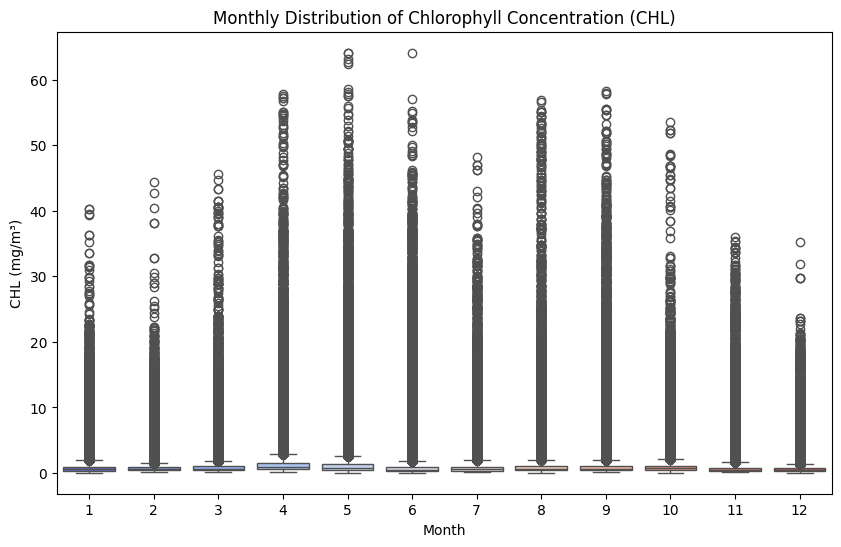

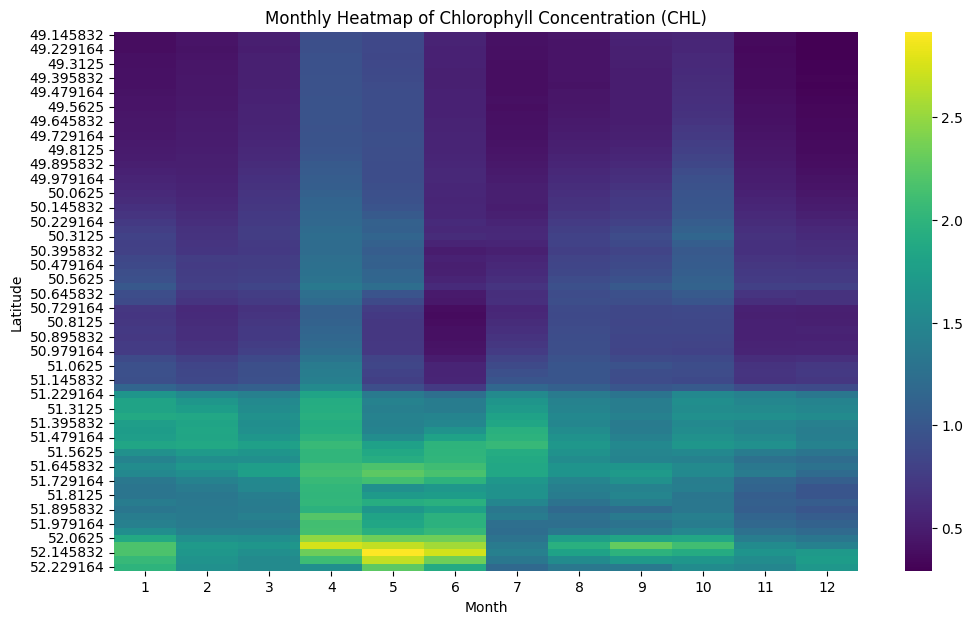

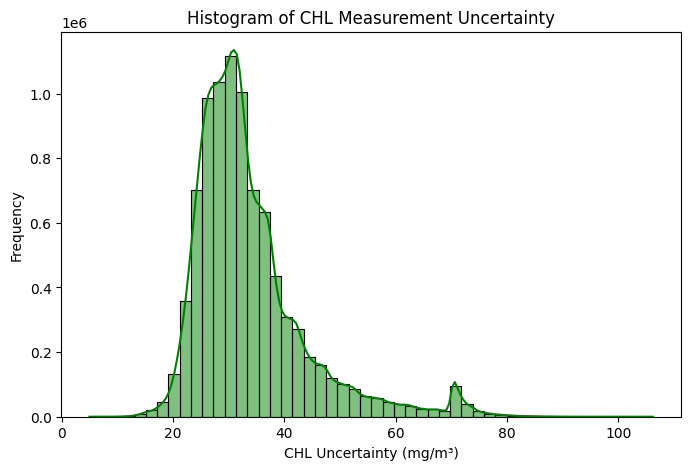

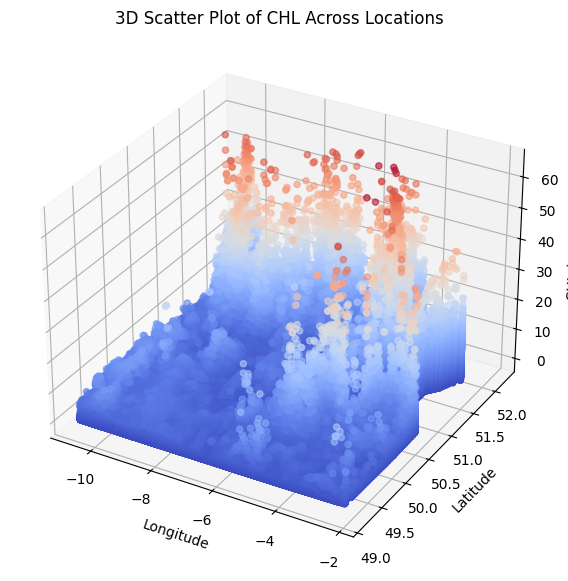

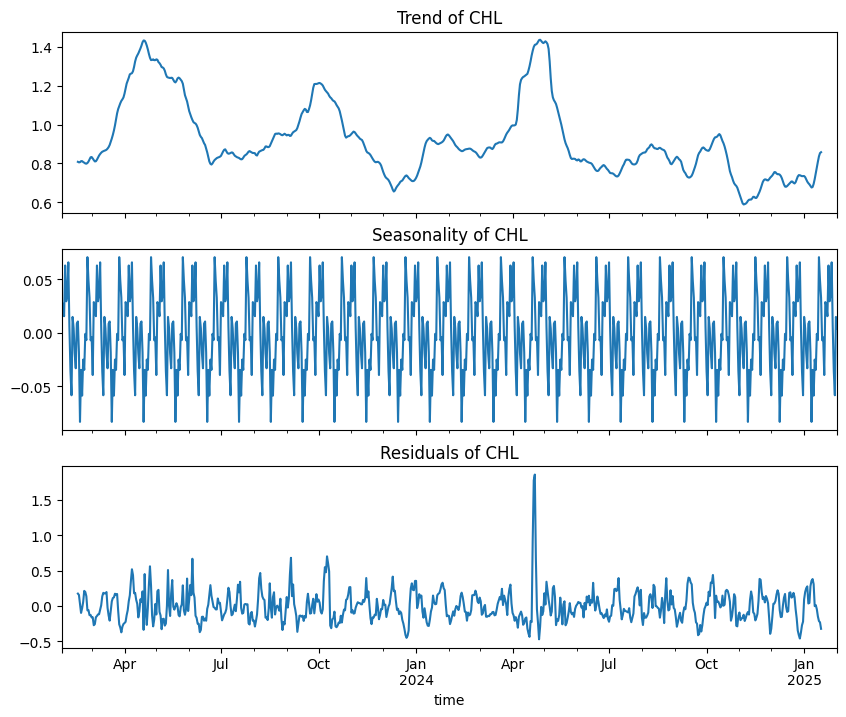

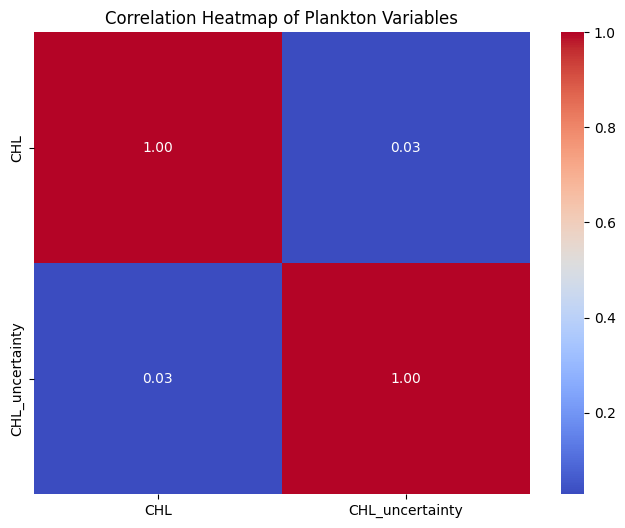

In [ ]:
# Load the Plankton dataset
plankton_df = pd.read_csv("PFeb23_25.csv", parse_dates=["time"])

# Handle missing values by dropping rows where CHL or CHL_uncertainty is NaN
plankton_df = plankton_df.dropna(subset=["CHL", "CHL_uncertainty"])

# Extract Month for Monthly Analysis
plankton_df["month"] = plankton_df["time"].dt.month

# Boxplot of CHL by Month
plt.figure(figsize=(10, 6))
sns.boxplot(x="month", y="CHL", data=plankton_df, palette="coolwarm")
plt.title("Monthly Distribution of Chlorophyll Concentration (CHL)")
plt.xlabel("Month")
plt.ylabel("CHL (mg/m³)")
plt.show()

# Monthly Heatmap of CHL
pivot_table = plankton_df.pivot_table(values="CHL", index="latitude", columns="month", aggfunc="mean")
plt.figure(figsize=(12, 7))
sns.heatmap(pivot_table, cmap="viridis", cbar=True)
plt.title("Monthly Heatmap of Chlorophyll Concentration (CHL)")
plt.xlabel("Month")
plt.ylabel("Latitude")
plt.show()

# Histogram of CHL Uncertainty
plt.figure(figsize=(8, 5))
sns.histplot(plankton_df["CHL_uncertainty"], bins=50, kde=True, color="green")
plt.title("Histogram of CHL Measurement Uncertainty")
plt.xlabel("CHL Uncertainty (mg/m³)")
plt.ylabel("Frequency")
plt.show()

# 3D Scatter Plot of CHL vs Latitude vs Longitude
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(plankton_df["longitude"], plankton_df["latitude"], plankton_df["CHL"], c=plankton_df["CHL"], cmap="coolwarm", alpha=0.6)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("CHL (mg/m³)")
ax.set_title("3D Scatter Plot of CHL Across Locations")
plt.show()

# Seasonal Decomposition of CHL
plankton_df_daily = plankton_df.groupby("time")["CHL"].mean().reset_index()
plankton_df_daily = plankton_df_daily.set_index("time")
decomposition = sm.tsa.seasonal_decompose(plankton_df_daily, model="additive", period=30)

fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
decomposition.trend.plot(ax=axes[0], title="Trend of CHL")
decomposition.seasonal.plot(ax=axes[1], title="Seasonality of CHL")
decomposition.resid.plot(ax=axes[2], title="Residuals of CHL")
plt.show()

# Correlation Heatmap (CHL, CHL Uncertainty)
corr_columns = ["CHL", "CHL_uncertainty"]
corr_matrix = plankton_df[corr_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Plankton Variables")
plt.show()

1.Monthly Distribution of Chlorophyll Concentration (CHL) (Boxplot)

This boxplot shows how chlorophyll concentration varies each month.
The median CHL values are relatively stable, but outliers indicate occasional high concentrations.
Spring and summer months (April-July) tend to have more extreme values, possibly indicating seasonal plankton blooms.

2.Monthly Heatmap of Chlorophyll Concentration (CHL)

This heatmap represents CHL concentration across latitudes over different months.
Higher CHL values (yellow regions) are observed at certain times, indicating seasonal or regional variations in plankton concentration.
Lower latitudes tend to have more CHL during certain months.

3.Histogram of CHL Measurement Uncertainty

This histogram represents the distribution of uncertainty in CHL measurements.
Most CHL uncertainties are concentrated between 20-40 mg/m³.
A secondary peak around 60 mg/m³ suggests occasional measurement inconsistencies.

4.3D Scatter Plot of CHL Across Locations

This 3D plot visualizes how CHL varies across different geographic locations.
Higher CHL values (red markers) indicate areas with high plankton activity.
Coastal areas tend to have higher CHL values compared to offshore regions.

5.Time Series Decomposition of CHL

This plot breaks down CHL into its trend, seasonality, and residuals.
The trend shows fluctuations over time, with peaks indicating periods of high plankton activity.
The seasonal component highlights periodic variations, likely influenced by environmental factors.
Residuals represent random noise in the data.

6.Correlation Heatmap of Plankton Variables

This matrix shows correlations between CHL and its uncertainty.
The correlation is very weak (0.03), indicating that CHL values do not strongly influence measurement uncertainty.

# 5.Transparency & Plankton (merged)

In [ ]:
# Load transparency dataset
df_transparency = pd.read_csv("filtered_df_feb.csv")

# Load plankton dataset
df_plankton = pd.read_csv("filtered_df_plankton.csv")

# Merge datasets on time, latitude, and longitude
df_combined = pd.merge(df_transparency, df_plankton, on=["time", "latitude", "longitude"], how="inner")

# Save merged dataset
df_combined.to_csv("merged_transparency_plankton.csv", index=False)

print("Merged dataset saved as merged_transparency_plankton.csv")

# Display dataset information
df_combined.info()

# Display first few rows
print(df_combined.head())

Merged dataset saved as merged_transparency_plankton.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8901381 entries, 0 to 8901380
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   time               object 
 1   latitude           float64
 2   longitude          float64
 3   KD490              float64
 4   KD490_uncertainty  float64
 5   ZSD                float64
 6   ZSD_uncertainty    float64
 7   flags_x            int64  
 8   CHL                float64
 9   CHL_uncertainty    float64
 10  flags_y            int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 747.0+ MB
         time   latitude  longitude     KD490  KD490_uncertainty        ZSD  \
0  2023-02-01  49.145832 -10.729161  0.040630          34.839999  22.839306   
1  2023-02-01  49.145832 -10.687495  0.040552          29.859999  22.893938   
2  2023-02-01  49.145832 -10.645828  0.040584          29.849999  22.871334   
3  2023-02-01  49.145832 -10.60416

In [ ]:
# Check missing values
missing_values = df_combined.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop rows with NaN values
df_combined_clean = df_combined.dropna()

# Save cleaned dataset
df_combined_clean.to_csv("merged_cleaned.csv", index=False)
print("Cleaned dataset saved as merged_cleaned.csv")


Missing Values:
 time                 0
latitude             0
longitude            0
KD490                0
KD490_uncertainty    0
ZSD                  0
ZSD_uncertainty      0
flags_x              0
CHL                  0
CHL_uncertainty      0
flags_y              0
dtype: int64
Cleaned dataset saved as merged_cleaned.csv


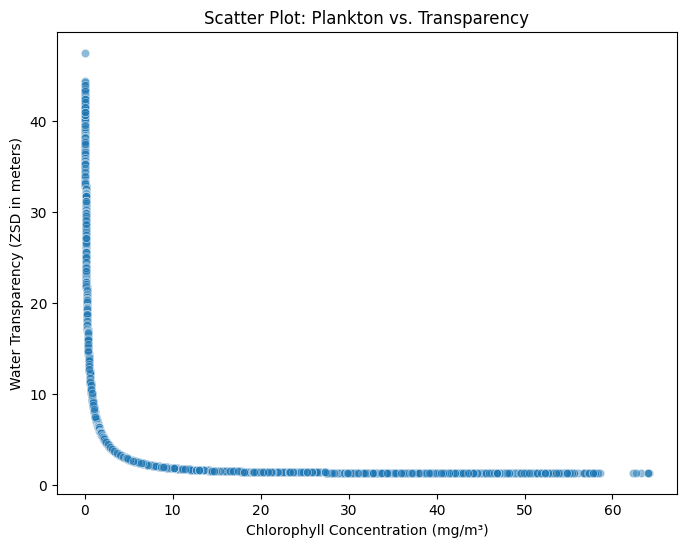

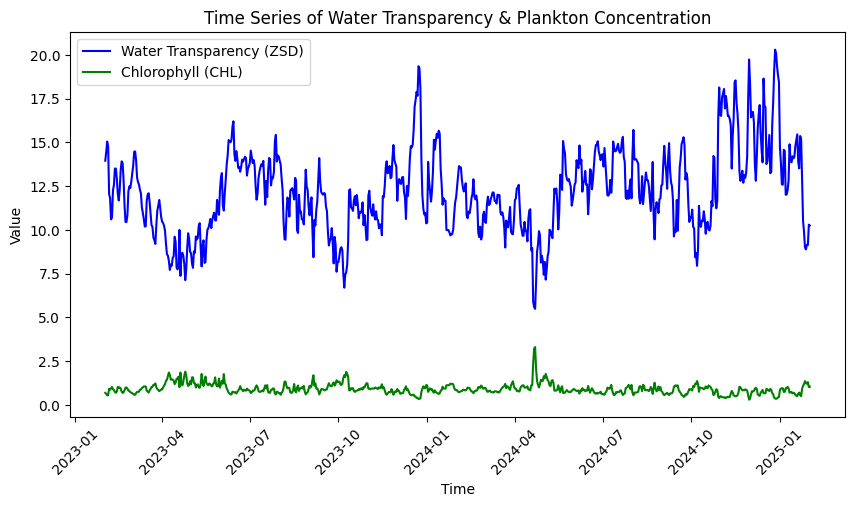

<ipython-input-8-b0e23bc46cae>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined_clean, x="month", y="CHL", palette="Blues")


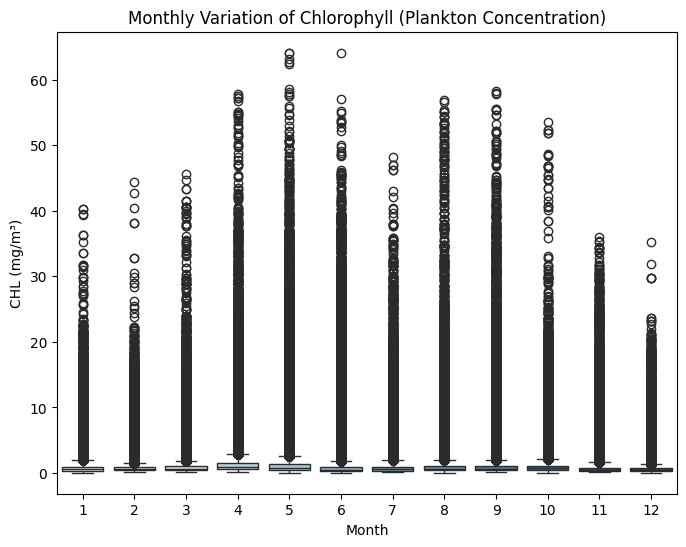

<ipython-input-8-b0e23bc46cae>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined_clean, x="month", y="ZSD", palette="Greens")


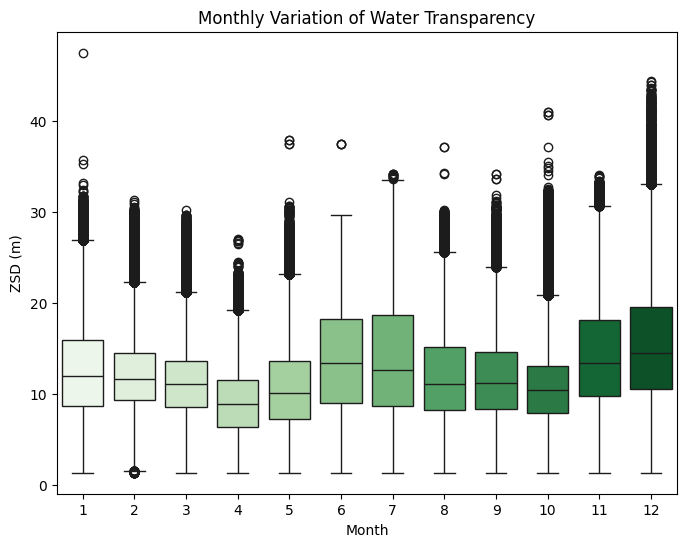

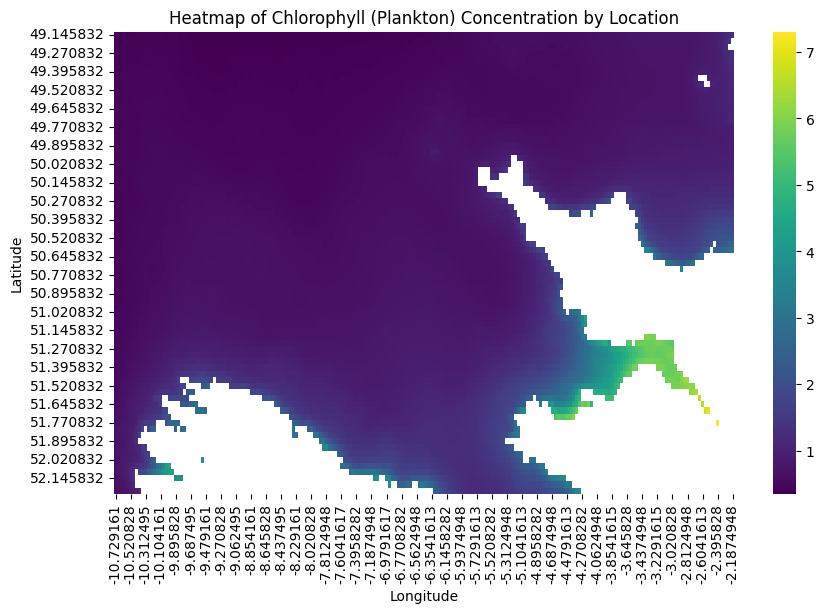

In [ ]:
# Scatter Plot: Water Transparency vs Plankton Concentration
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_combined_clean, x="CHL", y="ZSD", alpha=0.5)
plt.xlabel("Chlorophyll Concentration (mg/m³)")
plt.ylabel("Water Transparency (ZSD in meters)")
plt.title("Scatter Plot: Plankton vs. Transparency")
plt.show()

# Time Series Analysis
df_combined_clean["time"] = pd.to_datetime(df_combined_clean["time"])

# Aggregate daily mean values
df_time_series = df_combined_clean.groupby("time")[["ZSD", "CHL"]].mean().reset_index()

# Plot time series
plt.figure(figsize=(10, 5))
plt.plot(df_time_series["time"], df_time_series["ZSD"], label="Water Transparency (ZSD)", color="blue")
plt.plot(df_time_series["time"], df_time_series["CHL"], label="Chlorophyll (CHL)", color="green")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Time Series of Water Transparency & Plankton Concentration")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Monthly Trend
df_combined_clean["month"] = df_combined_clean["time"].dt.month

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_combined_clean, x="month", y="CHL", palette="Blues")
plt.title("Monthly Variation of Chlorophyll (Plankton Concentration)")
plt.xlabel("Month")
plt.ylabel("CHL (mg/m³)")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_combined_clean, x="month", y="ZSD", palette="Greens")
plt.title("Monthly Variation of Water Transparency")
plt.xlabel("Month")
plt.ylabel("ZSD (m)")
plt.show()

# Heatmap of Transparency & Plankton by Location
# Pivot data for heatmap
heatmap_data = df_combined_clean.pivot_table(index="latitude", columns="longitude", values="CHL")

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="viridis", cbar=True)
plt.title("Heatmap of Chlorophyll (Plankton) Concentration by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

1.Scatter Plot: Plankton vs. Transparency

X-axis: Chlorophyll Concentration (CHL) in mg/m³

Y-axis: Water Transparency (ZSD) in meters

Interpretation: This plot shows a clear inverse relationship between chlorophyll concentration and water transparency.
Higher plankton (CHL) levels correspond to lower transparency (ZSD), which aligns with the expectation that increased plankton blooms reduce water clarity by absorbing and scattering light.

2.Time Series of Water Transparency & Plankton Concentration

Blue Line: Water Transparency (ZSD)

Green Line: Chlorophyll Concentration (CHL)

Interpretation:
This time series shows how ZSD and CHL fluctuate over time.
There is an inverse trend where spikes in CHL correspond to dips in ZSD, reinforcing the negative correlation.
Seasonality patterns may indicate plankton blooms occurring during certain periods (e.g., summer months).

3.Monthly Variation of Chlorophyll (Plankton Concentration)

X-axis: Month (1-12)

Y-axis: CHL (mg/m³)

Interpretation:
This box plot shows seasonal variation in plankton concentration.
Months with higher medians and more extreme outliers indicate plankton blooms, which could be linked to environmental factors such as temperature and nutrient availability.
The peak months likely correspond to periods of high biological productivity.

4.Monthly Variation of Water Transparency

X-axis: Month (1-12)

Y-axis: Water Transparency (ZSD) in meters

Interpretation:
This box plot shows that transparency also has a seasonal cycle.
The inverse trend can be observed, where transparency is lower during peak plankton bloom months.
The variations and outliers indicate occasional clearer or murkier conditions outside the normal seasonal trend.

5.Heatmap of Chlorophyll (Plankton) Concentration by Location

X-axis: Longitude

Y-axis: Latitude

Color Scale: Higher CHL concentrations shown in yellow/green, lower in dark blue/purple.

Interpretation:
This heatmap reveals the spatial distribution of plankton concentration.
Coastal areas or specific regions may have higher concentrations, possibly due to nutrient runoff, upwelling, or ocean currents.
The distribution of plankton directly influences transparency, meaning areas with high CHL should show lower ZSD.

Inverse Relationship: The expected negative correlation between CHL and ZSD is confirmed.

Seasonal Variation: Plankton blooms are more frequent in specific months, leading to reduced transparency.

Geographical Differences: Some regions consistently show higher plankton levels, affecting water clarity.

Predictive Potential: If trends hold, CHL data can be used to estimate future transparency changes.